<a href="https://colab.research.google.com/github/csabi0312/Kiss-Csaba-DeepL-1-kishazi/blob/main/kishazi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1st task with the images (1,2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import zscore
import scipy.signal
import requests


## Download images

In [2]:
url = "https://raw.githubusercontent.com/csabi0312/Kiss-Csaba-DeepL-1-kishazi/main/00002.jpg?token=GHSAT0AAAAAACHMRXNKQKFWAHLJ4KCIQBXKZIRXDJA"
response = requests.get(url)
with open("img_1.png", "wb") as f:
    f.write(response.content)

url = "https://raw.githubusercontent.com/csabi0312/Kiss-Csaba-DeepL-1-kishazi/main/00007.jpg?token=GHSAT0AAAAAACHMRXNLGB2ZTI4RVMR2WOVGZIRXEDA"
response = requests.get(url)
with open("img_2.png", "wb") as f:
    f.write(response.content)

url = "https://raw.githubusercontent.com/csabi0312/Kiss-Csaba-DeepL-1-kishazi/main/00013.jpg?token=GHSAT0AAAAAACHMRXNKPHWGFGTAMV4NFYEGZIRXELA"
response = requests.get(url)
with open("img_3.png", "wb") as f:
    f.write(response.content)

url = "https://raw.githubusercontent.com/csabi0312/Kiss-Csaba-DeepL-1-kishazi/main/00020.jpg?token=GHSAT0AAAAAACHMRXNLJ65NJGQKCO2V4SNWZIRXESA"
response = requests.get(url)
with open("img_4.png", "wb") as f:
    f.write(response.content)

url = "https://raw.githubusercontent.com/csabi0312/Kiss-Csaba-DeepL-1-kishazi/main/00027.jpg?token=GHSAT0AAAAAACHMRXNLLQNKTKBJAWXWBC7QZIRXEZQ"
response = requests.get(url)
with open("img_5.png", "wb") as f:
    f.write(response.content)


In [3]:
import os

directory_path = "/content"  # Replace with the path to your directory

image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(".png")]

print("Image files:")
for image_file in image_files:
    print(image_file)


Image files:
/content/img_2.png
/content/img_1.png
/content/img_4.png
/content/img_3.png
/content/img_5.png


In [4]:
for i, image_path in enumerate(image_files):
        img = Image.open(image_path)
        img_array = np.array(img)
        print(image_path)
        print(img_array.shape)

/content/img_2.png
(256, 256, 3)
/content/img_1.png
(256, 256, 3)
/content/img_4.png
(256, 256, 3)
/content/img_3.png
(256, 256, 3)
/content/img_5.png
(256, 256, 3)


## Histograms

In [5]:
def plot_image_and_histograms(image_path):
    # Load the image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Image and RGB Channel Histograms", fontsize=16)

    # Plot the image
    axes[0, 0].imshow(img_array)
    axes[0, 0].set_title("Image")
    axes[0, 0].axis('off')

    # Plot the histograms for R, G, and B channels
    colors = ['green', 'blue']
    channels = ['R', 'G', 'B']

    channel_data = img_array[:, :, 0]
    axes[0, 1].hist(channel_data.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
    axes[0, 1].set_title(f"{channels[0]} Histogram")
    axes[0, 1].set_xlim(0, 256)
    axes[0, 1].set_xlabel("Pixel Value")
    axes[0, 1].set_ylabel("Frequency")
    axes[0, 1].axis('on')

    for i in range(0, 2):
        channel_data = img_array[:, :, i + 1]
        axes[1, i].hist(channel_data.ravel(), bins=256, range=(0, 256), color=colors[i], alpha=0.7)
        axes[1, i].set_title(f"{channels[i + 1]} Histogram")
        axes[1, i].set_xlim(0, 256)
        axes[1, i].set_xlabel("Pixel Value")
        axes[1, i].set_ylabel("Frequency")

    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

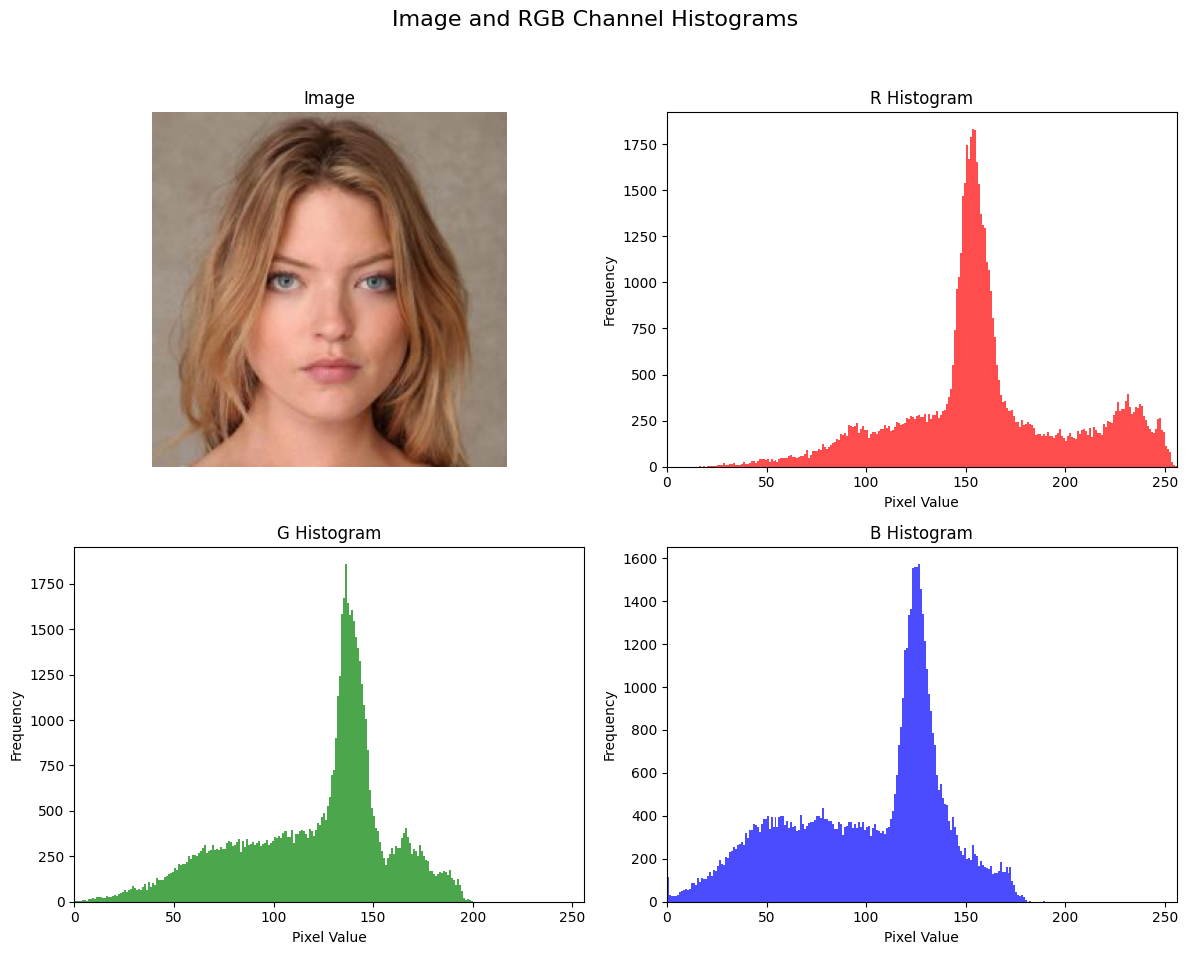

In [6]:
plot_image_and_histograms("/content/img_1.png")

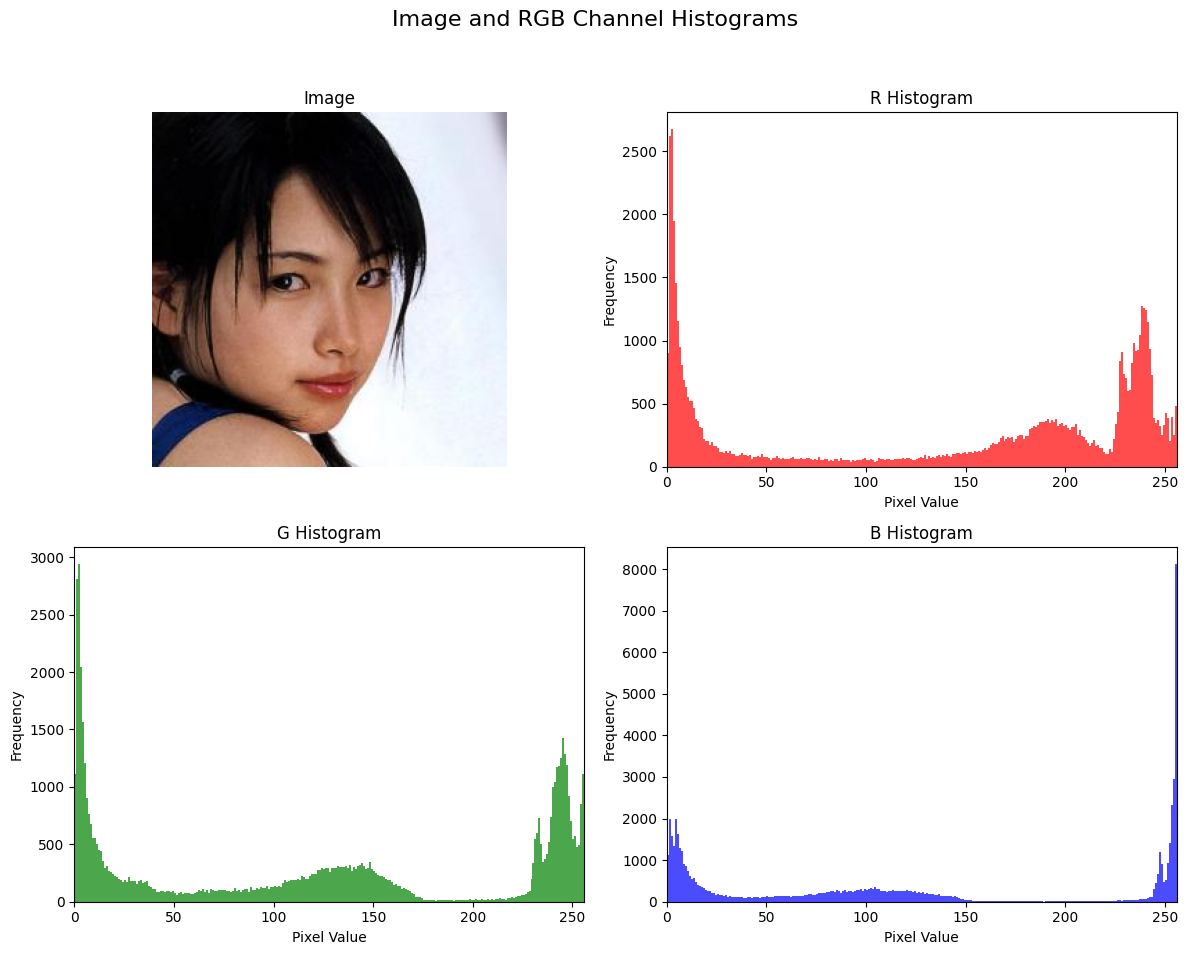

In [7]:
plot_image_and_histograms("/content/img_2.png")

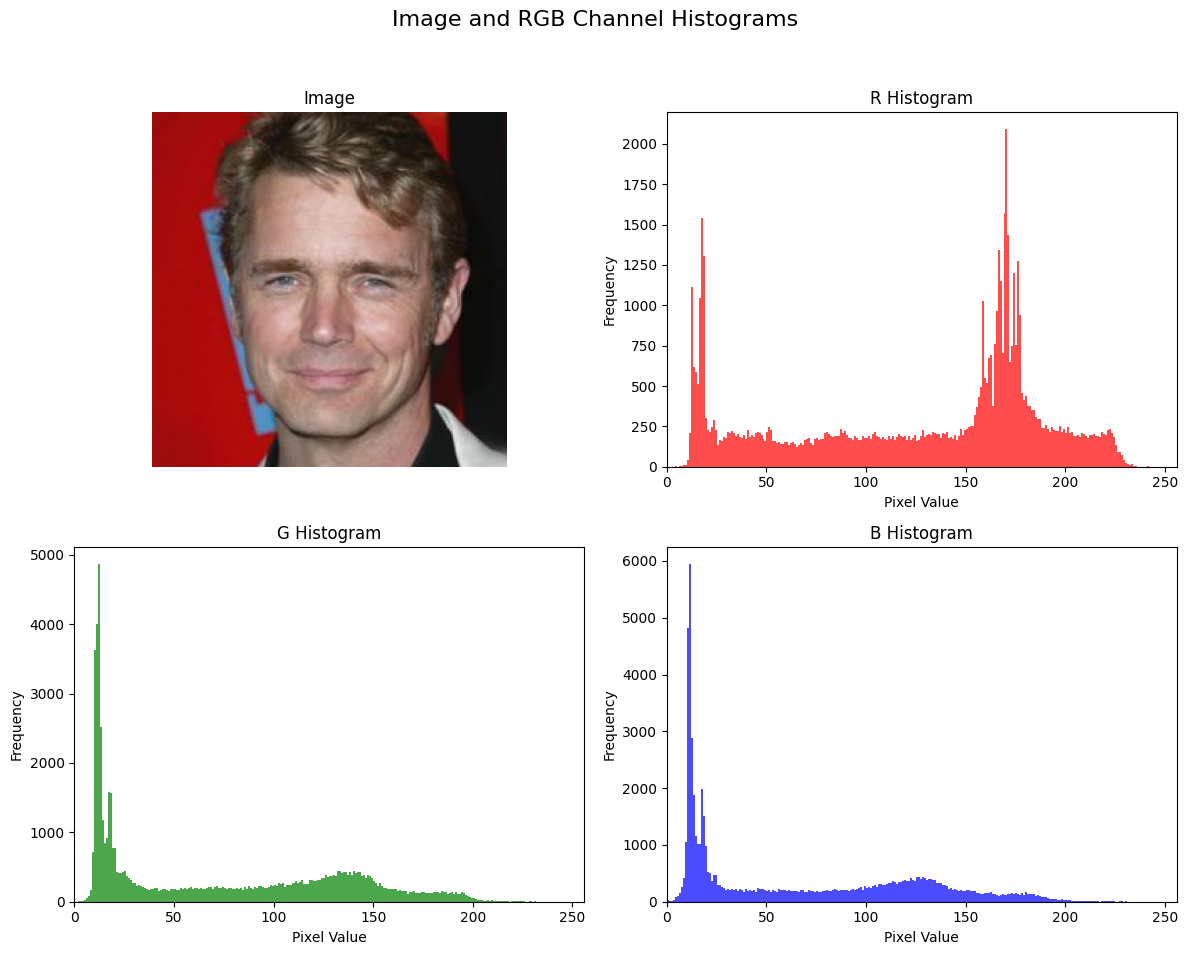

In [8]:
plot_image_and_histograms("/content/img_3.png")

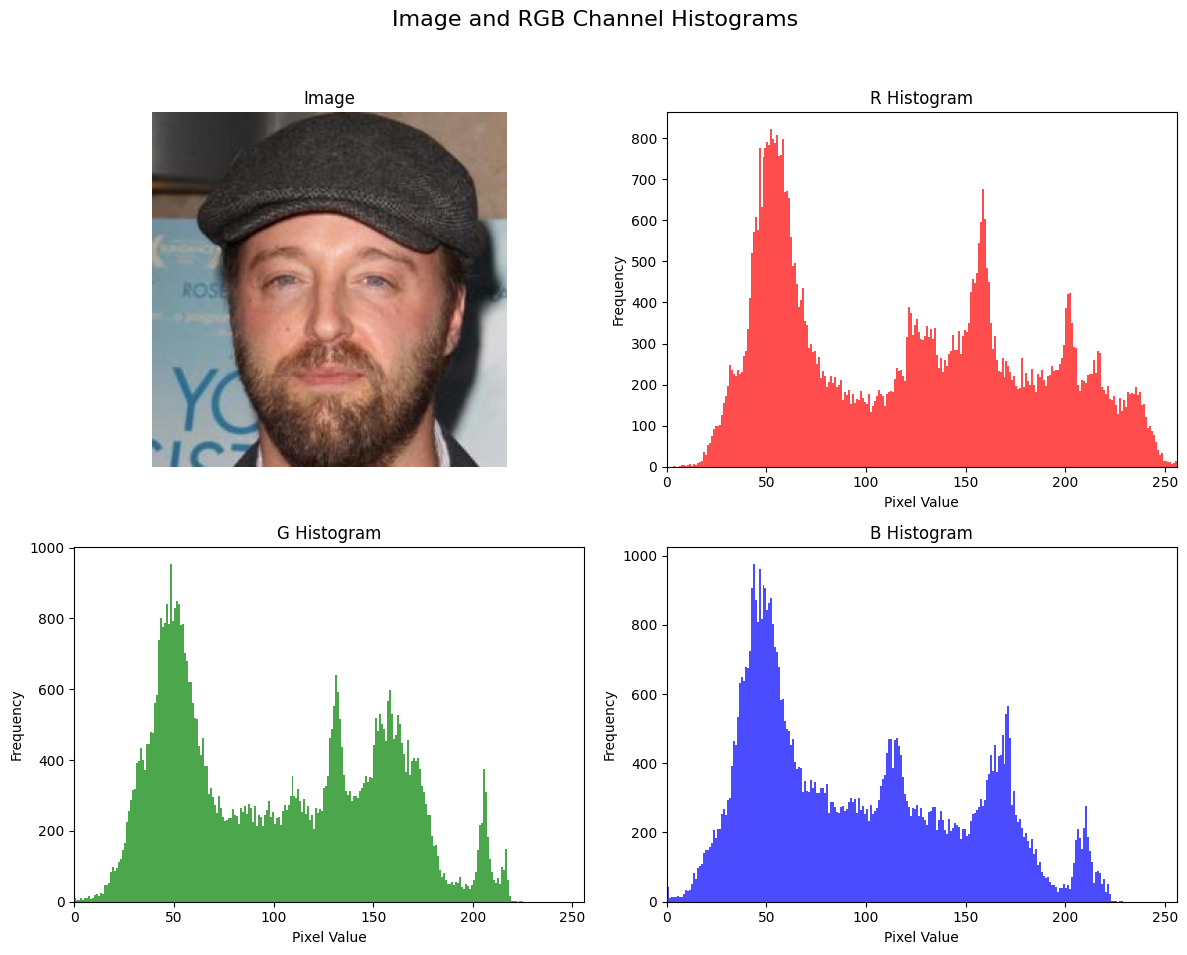

In [9]:
plot_image_and_histograms("/content/img_4.png")

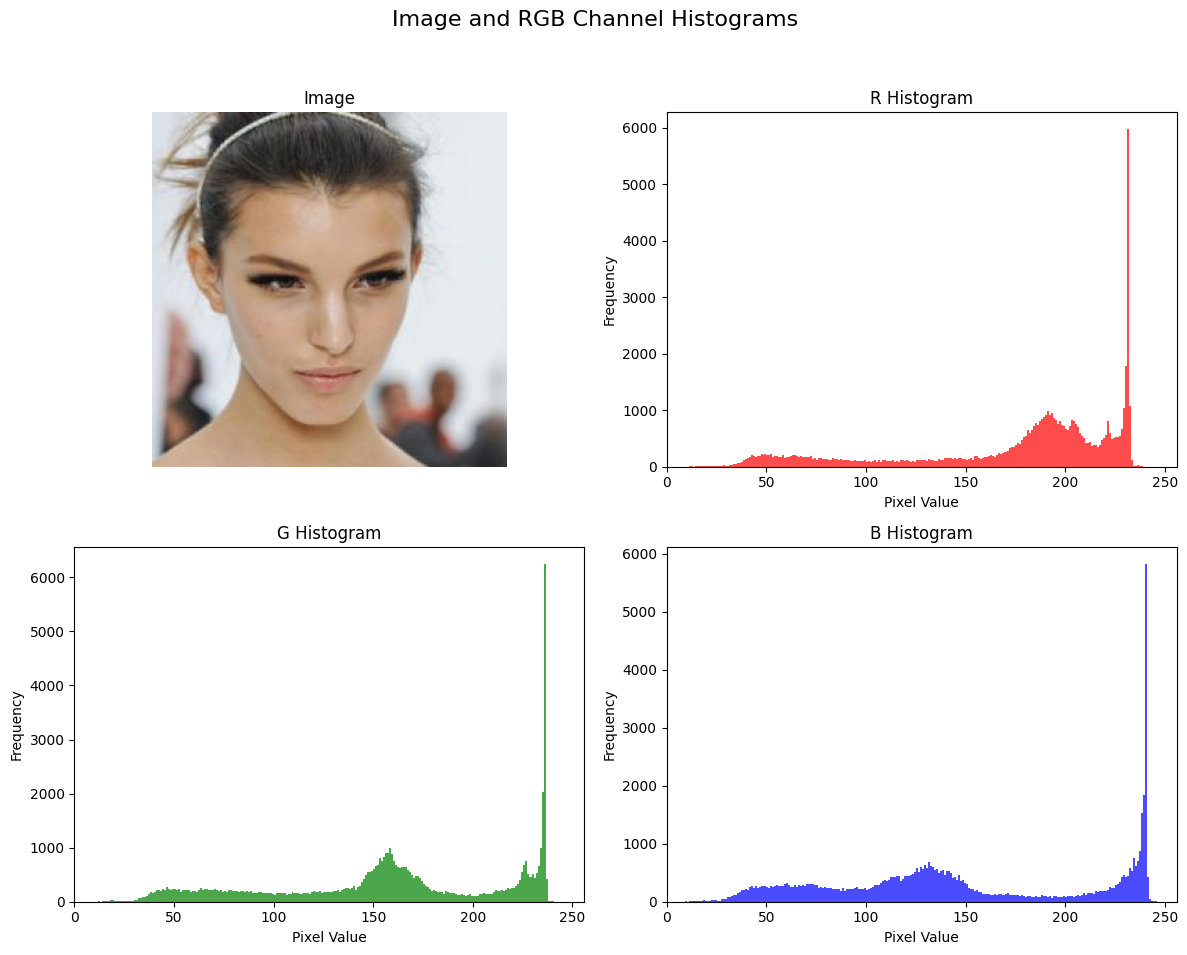

In [10]:
plot_image_and_histograms("/content/img_5.png")

##Standardization

In [11]:
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Calculate the mean and standard deviation for each channel
    channel_means = img_array.mean(axis=(0, 1))
    channel_stdevs = img_array.std(axis=(0, 1))

    # Create matrices for mean and standard deviation
    mean_matrix = np.zeros((256, 256, 3))
    mean_matrix[:,:,:] = channel_means

    stdevs_matrix = np.zeros((256, 256, 3))
    stdevs_matrix[:,:,:] = channel_stdevs

    # Standardize the image array
    standardized_img_array = (img_array - channel_means) / channel_stdevs

    return standardized_img_array

In [12]:
stand_ims=[preprocess_image("/content/img_1.png"),
preprocess_image("/content/img_2.png"),
preprocess_image("/content/img_3.png"),
preprocess_image("/content/img_4.png"),
preprocess_image("/content/img_5.png")]

In [13]:
for i,image in enumerate(stand_ims):
    print(f"Image {i + 1}")
    print(f"Means of the 3 channels (RGB): {image[:,:,0].mean():.4f}, {image[:,:,1].mean():.4f}, {image[:,:,2].mean():.4f}")
    print(f"Standard deviations of the 3 channels (RGB): {image[:,:,0].std():.4f}, {image[:,:,1].std():.4f}, {image[:,:,2].std():.4f}")
    print("\n")

Image 1
Means of the 3 channels (RGB): 0.0000, -0.0000, -0.0000
Standard deviations of the 3 channels (RGB): 1.0000, 1.0000, 1.0000


Image 2
Means of the 3 channels (RGB): -0.0000, 0.0000, -0.0000
Standard deviations of the 3 channels (RGB): 1.0000, 1.0000, 1.0000


Image 3
Means of the 3 channels (RGB): -0.0000, -0.0000, 0.0000
Standard deviations of the 3 channels (RGB): 1.0000, 1.0000, 1.0000


Image 4
Means of the 3 channels (RGB): 0.0000, -0.0000, -0.0000
Standard deviations of the 3 channels (RGB): 1.0000, 1.0000, 1.0000


Image 5
Means of the 3 channels (RGB): -0.0000, 0.0000, -0.0000
Standard deviations of the 3 channels (RGB): 1.0000, 1.0000, 1.0000




# Task with sound spectograms (3,4)

##Downloading the sound files

In [23]:
url = "https://www.pacdv.com/sounds/voices/maybe-next-time-huh.wav"
response = requests.get(url)
with open("sound_1.wav", "wb") as f:
    f.write(response.content)

url = "https://www.pacdv.com/sounds/voices/oh-yeah-everything-is-fine.wav"
response = requests.get(url)
with open("sound_2.wav", "wb") as f:
    f.write(response.content)

In [26]:
!wget https://www.pacdv.com/sounds/voices/maybe-next-time-huh.wav

--2023-09-25 16:57:14--  https://www.pacdv.com/sounds/voices/maybe-next-time-huh.wav
Resolving www.pacdv.com (www.pacdv.com)... 192.232.218.187
Connecting to www.pacdv.com (www.pacdv.com)|192.232.218.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176652 (173K) [audio/x-wav]
Saving to: ‘maybe-next-time-huh.wav’

maybe-next-time-huh 100%[===================>] 172.51K   689KB/s    in 0.3s    

2023-09-25 16:57:14 (689 KB/s) - ‘maybe-next-time-huh.wav’ saved [176652/176652]



In [27]:
!wget https://www.pacdv.com/sounds/voices/oh-yeah-everything-is-fine.wav

--2023-09-25 16:57:15--  https://www.pacdv.com/sounds/voices/oh-yeah-everything-is-fine.wav
Resolving www.pacdv.com (www.pacdv.com)... 192.232.218.187
Connecting to www.pacdv.com (www.pacdv.com)|192.232.218.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339612 (332K) [audio/x-wav]
Saving to: ‘oh-yeah-everything-is-fine.wav.1’

oh-yeah-everything- 100%[===================>] 331.65K  1.14MB/s    in 0.3s    

2023-09-25 16:57:15 (1.14 MB/s) - ‘oh-yeah-everything-is-fine.wav.1’ saved [339612/339612]



In [28]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the file paths of the two audio files
audio_file1 = '/content/oh-yeah-everything-is-fine.wav'
audio_file2 = '/content/maybe-next-time-huh.wav'

# Load the first audio file
y1, sr1 = librosa.load(audio_file1)

# Calculate the spectrogram for the first audio file
D1 = librosa.amplitude_to_db(librosa.stft(y1), ref=np.max)

# Load the second audio file
y2, sr2 = librosa.load(audio_file2)

# Calculate the spectrogram for the second audio file
D2 = librosa.amplitude_to_db(librosa.stft(y2), ref=np.max)

<ipython-input-28-f4ff36c254eb>:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D1 = librosa.amplitude_to_db(librosa.stft(y1), ref=np.max)
<ipython-input-28-f4ff36c254eb>:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D2 = librosa.amplitude_to_db(librosa.stft(y2), ref=np.max)


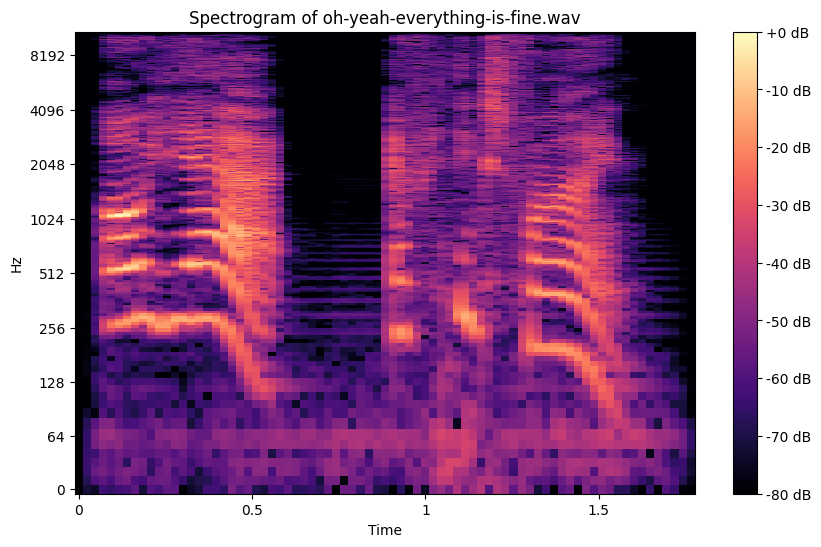

In [30]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of oh-yeah-everything-is-fine.wav')
plt.show()

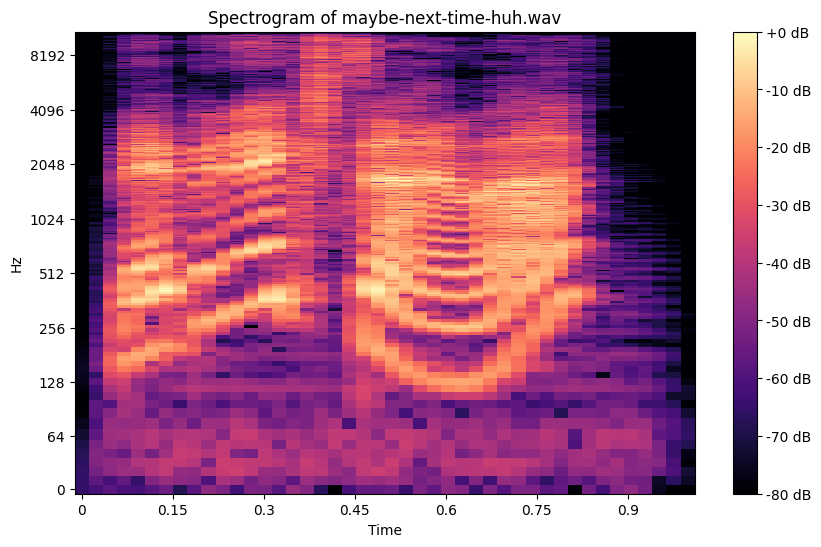

In [31]:
# Plot the spectrogram of the second audio file
plt.figure(figsize=(10, 6))
librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of maybe-next-time-huh.wav')
plt.show()

## Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
standard_d1=StandardScaler().fit_transform(D1)
standard_d2=StandardScaler().fit_transform(D2)
standard_d2.shape

(1025, 44)

In [33]:
acc=0.0001
# Check mean for each column
mean_check = np.allclose(standard_d1.mean(axis=0), 0, atol=acc)
# Check standard deviation for each column, considering it might be zero
std_deviation_check = np.all(np.isclose(standard_d1.std(axis=0), 1, atol=acc) | (standard_d1.std(axis=0) == 0))

if mean_check and std_deviation_check:
    print(f"All columns of the first spectogram have zero mean and one standard deviation with {acc} accuracy. Except for columns with 0 standard deviation.")
else:
    print("Not all columns meet the criteria.")

All columns of the first spectogram have zero mean and one standard deviation with 0.0001 accuracy. Except for columns with 0 standard deviation.


In [34]:
acc=0.0001
# Check mean for each column
mean_check = np.allclose(standard_d2.mean(axis=0), 0, atol=acc)
# Check standard deviation for each column, considering it might be zero
std_deviation_check = np.all(np.isclose(standard_d2.std(axis=0), 1, atol=acc) | (standard_d2.std(axis=0) == 0))

if mean_check and std_deviation_check:
    print(f"All columns of the second spectogram have zero mean and one standard deviation with {acc} accuracy. Except for columns with 0 standard deviation.")
else:
    print("Not all columns meet the criteria.")

All columns of the second spectogram have zero mean and one standard deviation with 0.0001 accuracy. Except for columns with 0 standard deviation.


#Task with character counting

Textual Content:
Ha a tárgyról lecsúsztál, de szeretnél a deep learningbe belekezdeni, vagy már elvégezted a tárgyat és szeretnél elmélyülni a témában, akár PhD-zni, akkor olvass tovább az alábbi gombra kattintva:


További tudnivalók



  "Először is szeretném megköszönni a Deep Learning a Gyagorlatban Python és Lua alapokon tárgy keretein belül végzett munkád (illetve a társoktatóknak is) és a rengetek tudást amit kaptam. 
	A tőletek kapott tudásnak hála tovább foglalkoztam a tárgyon belül leadott házi feladatommal (IMU szenzorjelek feldolgozása deep learning segítségévével) és a projekttel elnyertem a Suzuki Foundation ösztöndíját, így a következő fél évben Japánban kutathatok a Shizuoko Egyetemen."

  "Kiss Gábor vagyok, utolsó éves mesterképzéses mechatronikai mérnök hallgató és 2017-ben hallgattam a tárgyukat, Deep Learning a gyakorlatban python és Lua alapon. A házi feladatom parancsszó felismerő neurális hálózatok tanítása és összehasonlítása volt.
  Azért írok Önöknek, hogy kö

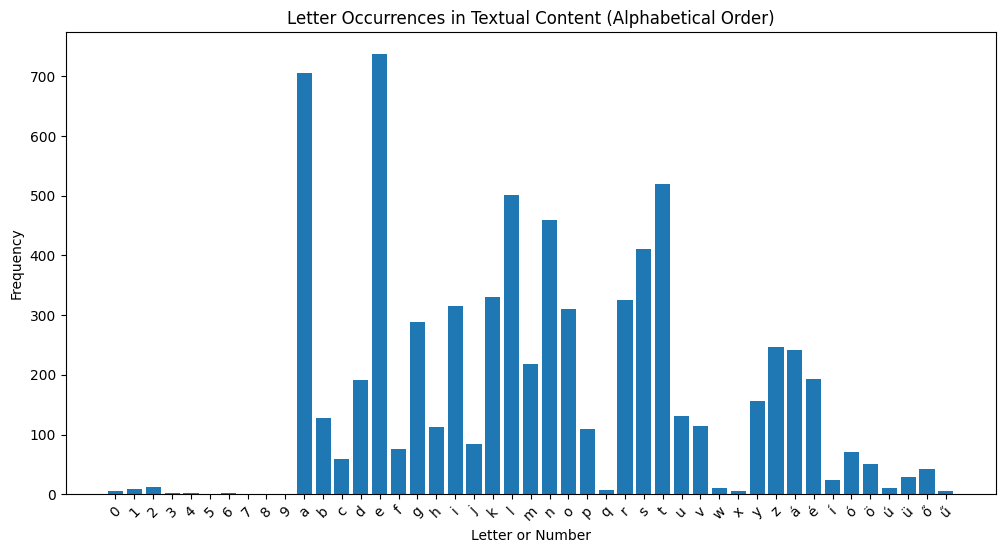

In [35]:
import requests
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup
import re

# Define the URL of the webpage
url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find and extract the textual content (inside <p> tags)
    paragraphs = soup.find_all('p')
    textual_content = '\n'.join([p.get_text() for p in paragraphs])

    # Display the textual content
    print("Textual Content:")
    print(textual_content)

    # Remove non-letter, non-number characters (keep only Hungarian alphabet and numbers)
    cleaned_text = re.sub(r'[^a-zA-ZáéíóöőúüűÁÉÍÓÖŐÚÜŰ0-9]', '', textual_content)

    # Convert the text to lowercase (for case-insensitive letter counting)
    cleaned_text = cleaned_text.lower()

    # Count the frequency of each letter in the content
    letter_counts = Counter(cleaned_text)

    # Extract letters and their corresponding counts and sort them alphabetically
    letters = sorted(list(letter_counts.keys()))

    # Filter out letters that are not in the Hungarian alphabet or numbers
    valid_letters = [char for char in letters if char.isnumeric() or char in 'aábcdeéfghiíjklmnoóöőpqrstuúüűvwxyz']

    # Extract counts for the valid letters
    counts = [letter_counts[char] for char in valid_letters]

    # Create a histogram of letter occurrences
    plt.figure(figsize=(12, 6))
    plt.bar(valid_letters, counts)
    plt.title("Letter Occurrences in Textual Content (Alphabetical Order)")
    plt.xlabel("Letter or Number")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Failed to retrieve webpage content. Status code:", response.status_code)
